In [229]:
import pandas as pd
import numpy as np


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import scikit-Learn module classification report to later use for information about how the system 
#try to classify/lable each record

from sklearn.metrics import classification_report

In [81]:
df= pd.read_csv (r'C:\Users\Bhavya Lahari\Desktop\UNT\Machine Learning\Project\train-data.csv')
#df_test= pd.read_csv (r'C:\Users\Bhavya Lahari\Desktop\UNT\Machine Learning\Project\test-data.csv')

# Cleaning Data

In [82]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [83]:
#df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [84]:
df = df.iloc[: , 1:]
#df_test=df_test.iloc[: ,1:]

In [85]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [86]:
#df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [87]:
#Checking if there are null values in the dataframe
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [88]:
#df_test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [89]:
# getting the number of columns and number of rows.
df.shape

(6019, 13)

In [90]:
#df_test.shape

(1234, 12)

In [91]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [92]:
#df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [93]:
#get the statistical summary
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [94]:
#df_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [95]:
# drop the column New_Price as there are many null values
df=df.drop(columns=['New_Price'])
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [96]:
#df_test=df_test.drop(columns=['New_Price'])
#df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [97]:
for i in df['Power']:
    print(i)

58.16 bhp
126.2 bhp
88.7 bhp
88.76 bhp
140.8 bhp
55.2 bhp
63.1 bhp
171.5 bhp
103.6 bhp
74 bhp
103.25 bhp
116.3 bhp
74 bhp
187.7 bhp
115 bhp
175.56 bhp
98.6 bhp
74 bhp
83.8 bhp
167.62 bhp
190 bhp
88.5 bhp
177.01 bhp
80 bhp
103.6 bhp
116.3 bhp
63.1 bhp
67.1 bhp
88.7 bhp
102 bhp
108.45 bhp
138.1 bhp
184 bhp
179.5 bhp
103.5 bhp
64 bhp
88.5 bhp
82 bhp
254.8 bhp
73.9 bhp
46.3 bhp
37.5 bhp
77 bhp
82.9 bhp
149.92 bhp
138.03 bhp
112.2 bhp
163.7 bhp
71 bhp
105 bhp
174.33 bhp
74 bhp
75 bhp
74 bhp
82 bhp
103.2 bhp
53.3 bhp
78.9 bhp
147.6 bhp
67.1 bhp
147.8 bhp
68 bhp
186 bhp
170 bhp
69 bhp
140 bhp
78 bhp
194 bhp
88.5 bhp
88.7 bhp
500 bhp
140 bhp
78.9 bhp
108.5 bhp
86.8 bhp
187.74 bhp
null bhp
132 bhp
102 bhp
null bhp
74 bhp
88.7 bhp
86.7 bhp
68 bhp
73.94 bhp
117.3 bhp
218 bhp
78.9 bhp
82 bhp
null bhp
86.7 bhp
168.5 bhp
174.33 bhp
89.84 bhp
140 bhp
98.6 bhp
73.9 bhp
110 bhp
67.1 bhp
103.5 bhp
90 bhp
82.85 bhp
67 bhp
241.4 bhp
80 bhp
35 bhp
78.9 bhp
270.9 bhp
140 bhp
126.32 bhp
171.5 bhp
73 bhp
37.5

174.33 bhp
170 bhp
105.5 bhp
86.7 bhp
126.2 bhp
68.05 bhp
100 bhp
85.8 bhp
94 bhp
140 bhp
67.1 bhp
79.4 bhp
179.5 bhp
113.98 bhp
nan
88.7 bhp
98.6 bhp
79.4 bhp
140 bhp
99 bhp
126.32 bhp
117.3 bhp
78.9 bhp
190 bhp
147.51 bhp
152 bhp
81.86 bhp
88.5 bhp
117.3 bhp
313 bhp
67.04 bhp
148 bhp
68 bhp
102 bhp
73.75 bhp
362.07 bhp
nan
194 bhp
81.86 bhp
117.3 bhp
550 bhp
100 bhp
125 bhp
77 bhp
215 bhp
47.3 bhp
174.33 bhp
67.05 bhp
140 bhp
168.7 bhp
55.23 bhp
201.15 bhp
126.2 bhp
118 bhp
174.33 bhp
60 bhp
46.3 bhp
83.1 bhp
140 bhp
94.68 bhp
81.86 bhp
167.62 bhp
117.3 bhp
110.4 bhp
83.1 bhp
78.9 bhp
102 bhp
83.1 bhp
241.4 bhp
194.3 bhp
null bhp
118 bhp
90 bhp
63 bhp
174.5 bhp
215 bhp
181 bhp
67.1 bhp
88.50 bhp
177 bhp
88.5 bhp
69.01 bhp
67.1 bhp
55.2 bhp
153.86 bhp
158 bhp
103.6 bhp
91.1 bhp
55.2 bhp
174.3 bhp
140 bhp
74 bhp
73.9 bhp
201.15 bhp
108.45 bhp
85.8 bhp
100.6 bhp
121.3 bhp
88.73 bhp
140 bhp
117.3 bhp
187.7 bhp
68 bhp
150 bhp
null bhp
174.33 bhp
86.8 bhp
118 bhp
73.9 bhp
120 bhp
116.3 bhp

74 bhp
80 bhp
300 bhp
73 bhp
190 bhp
88.50 bhp
81.86 bhp
103.2 bhp
174.33 bhp
68.05 bhp
138.03 bhp
100 bhp
68.05 bhp
102 bhp
79.4 bhp
102 bhp
180 bhp
77 bhp
73.9 bhp
132 bhp
120 bhp
258 bhp
98.6 bhp
73.9 bhp
140 bhp
103.5 bhp
117.3 bhp
174.3 bhp
118 bhp
81.80 bhp
47.3 bhp
68 bhp
62.1 bhp
67.1 bhp
98.6 bhp
116.3 bhp
98.6 bhp
121.3 bhp
67.1 bhp
203 bhp
241 bhp
64 bhp
108.45 bhp
120 bhp
197.2 bhp
67.1 bhp
nan
78.9 bhp
86.8 bhp
67 bhp
147.51 bhp
165 bhp
67.1 bhp
187.74 bhp
53.3 bhp
47.3 bhp
100 bhp
138.1 bhp
99 bhp
86.8 bhp
92 bhp
120 bhp
210 bhp
120 bhp
147.51 bhp
79.4 bhp
74 bhp
125 bhp
241.4 bhp
55.2 bhp
88.76 bhp
110.5 bhp
108.45 bhp
116.3 bhp
46.3 bhp
78.9 bhp
62 bhp
103.6 bhp
174.33 bhp
88.7 bhp
121.3 bhp
79.4 bhp
53.64 bhp
81.86 bhp
157.7 bhp
74 bhp
67.04 bhp
141 bhp
118 bhp
218 bhp
177.46 bhp
100.6 bhp
67.04 bhp
88.76 bhp
107.3 bhp
112 bhp
98.6 bhp
53.3 bhp
53.3 bhp
241.4 bhp
126.32 bhp
171.5 bhp
80 bhp
73.9 bhp
103.6 bhp
78 bhp
103.2 bhp
94 bhp
138.1 bhp
204 bhp
81.83 bhp
78.9 bhp

In [98]:
#removing corrupted values from the column
def process_power(x):
    """
    Function to process an entry in 'Power' column
    """
    if type(x) == str:
        if float(x.split()[0] == 'null'):
            return np.nan
        return float(x.split()[0])
    else:
        return x

In [99]:
df['Power'] = df['Power'].apply(process_power)
df_test['Power'] = df_test['Power'].apply(process_power)
for i in df['Power']:
    print(i)

58.16
126.2
88.7
88.76
140.8
55.2
63.1
171.5
103.6
74.0
103.25
116.3
74.0
187.7
115.0
175.56
98.6
74.0
83.8
167.62
190.0
88.5
177.01
80.0
103.6
116.3
63.1
67.1
88.7
102.0
108.45
138.1
184.0
179.5
103.5
64.0
88.5
82.0
254.8
73.9
46.3
37.5
77.0
82.9
149.92
138.03
112.2
163.7
71.0
105.0
174.33
74.0
75.0
74.0
82.0
103.2
53.3
78.9
147.6
67.1
147.8
68.0
186.0
170.0
69.0
140.0
78.0
194.0
88.5
88.7
500.0
140.0
78.9
108.5
86.8
187.74
nan
132.0
102.0
nan
74.0
88.7
86.7
68.0
73.94
117.3
218.0
78.9
82.0
nan
86.7
168.5
174.33
89.84
140.0
98.6
73.9
110.0
67.1
103.5
90.0
82.85
67.0
241.4
80.0
35.0
78.9
270.9
140.0
126.32
171.5
73.0
37.5
190.0
130.0
100.6
150.0
75.94
215.0
88.5
nan
107.3
126.2
67.1
37.48
120.0
178.0
58.16
152.0
103.2
91.1
140.0
85.8
67.1
362.07
121.3
46.3
143.0
88.7
130.0
170.0
98.6
81.8
nan
171.0
76.8
103.52
91.1
444.0
190.0
174.33
74.0
362.9
103.52
138.1
55.2
73.9
67.06
86.8
120.7
98.6
100.6
81.8
140.0
89.84
168.5
108.5
68.0
258.0
167.62
86.8
78.9
170.0
81.86
174.33
103.6
112.0
88.7

67.1
55.2
153.86
158.0
103.6
91.1
55.2
174.3
140.0
74.0
73.9
201.15
108.45
85.8
100.6
121.3
88.73
140.0
117.3
187.7
68.0
150.0
nan
174.33
86.8
118.0
73.9
120.0
116.3
103.5
140.0
105.0
83.1
98.6
103.2
47.3
255.0
117.3
108.5
46.3
174.5
90.0
68.0
88.5
126.32
152.88
73.9
132.0
204.0
83.8
86.7
181.0
85.8
67.04
34.2
88.8
90.0
158.2
67.04
198.5
83.1
88.7
120.0
74.0
80.0
164.7
67.1
190.0
67.1
170.0
47.3
85.8
82.5
90.0
163.2
87.2
168.5
103.52
86.8
73.9
73.9
67.1
67.06
140.0
82.0
89.84
80.46
117.3
118.0
67.04
103.6
171.5
80.0
73.94
174.33
102.57
130.0
84.0
147.51
85.8
174.5
203.2
90.0
81.8
103.6
85.8
91.7
118.0
126.2
98.6
35.0
81.8
224.0
47.3
70.0
147.8
177.0
194.3
190.0
68.0
nan
187.7
nan
46.3
171.0
nan
110.0
83.1
112.0
121.4
68.0
98.6
108.45
98.96
241.0
174.5
62.1
184.0
67.04
81.83
123.24
88.5
174.33
86.7
110.4
67.1
241.38
167.7
74.0
65.0
103.25
35.0
118.0
86.8
88.73
110.4
147.51
143.0
138.03
120.0
121.3
100.0
184.0
nan
241.4
46.3
80.0
149.92
88.5
258.0
78.0
108.5
117.3
81.8
138.1
81.83
140.0


103.6
88.8
74.0
68.05
140.0
88.5
140.0
88.8
198.5
104.68
67.0
67.06
68.0
138.1
80.0
171.5
86.8
138.1
204.0
168.7
103.2
98.6
138.1
100.0
190.0
74.0
77.0
90.0
81.8
82.0
86.7
81.86
103.6
88.5
103.6
80.0
86.8
117.3
37.48
364.9
64.0
157.75
241.4
81.8
102.0
154.0
136.0
147.8
nan
74.0
100.6
nan
79.4
68.0
170.0
88.73
102.0
313.0
108.4
55.0
158.8
138.1
157.8
98.6
138.0
67.1
86.7
67.0
91.1
88.73
147.8
88.5
270.9
82.0
245.0
71.0
140.0
91.1
102.0
170.0
78.9
78.9
74.0
64.0
258.0
335.2
245.0
85.8
84.8
138.03
67.1
138.03
174.33
88.8
82.0
69.0
74.0
103.5
84.0
117.3
86.76
174.33
103.6
103.6
118.0
67.04
193.1
98.6
58.16
165.0
47.3
81.83
89.84
184.0
245.0
86.7
110.4
270.9
138.0
78.9
170.0
108.5
141.0
70.0
86.7
70.0
163.0
53.0
55.2
47.3
73.9
78.9
97.7
138.1
110.0
47.3
88.76
126.2
241.4
69.0
62.0
81.86
169.0
41.0
81.86
118.0
81.86
102.0
395.0
171.5
64.0
74.0
91.72
67.1
83.8
107.2
67.04
48.21
81.86
67.04
81.86
81.83
121.3
147.51
88.2
86.7
87.2
98.6
241.38
67.04
98.6
152.0
121.3
194.3
78.9
68.0
78.9
71.0
174

In [100]:
# Dropping all the rows with null values
print("Shape of train data Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of train data Before dropping any Row:  (6019, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5874, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5872, 12)


In [101]:
df = df.reset_index(drop=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,17.74


In [102]:
# Dropping all the rows with null values
# print("Shape of train data Before dropping any Row: ",df_test.shape)
# df_test = df_test[df_test['Mileage'].notna()]
# print("Shape of train data After dropping Rows with NULL values in Mileage: ",df_test.shape)
# df_test = df_test[df_test['Engine'].notna()]
# print("Shape of train data After dropping Rows with NULL values in Engine : ",df_test.shape)
# df_test = df_test[df_test['Power'].notna()]
# print("Shape of train data After dropping Rows with NULL values in Power  : ",df_test.shape)
# df_test = df_test[df_test['Seats'].notna()]
# print("Shape of train data After dropping Rows with NULL values in Seats  : ",df_test.shape)

Shape of train data Before dropping any Row:  (1234, 11)
Shape of train data After dropping Rows with NULL values in Mileage:  (1234, 11)
Shape of train data After dropping Rows with NULL values in Engine :  (1224, 11)
Shape of train data After dropping Rows with NULL values in Power  :  (1202, 11)
Shape of train data After dropping Rows with NULL values in Seats  :  (1201, 11)


# Reformat the columns in the dataframe

In [103]:
df["Engine"] = df["Engine"].str.replace('CC','')
#df['Power'] = df['Power'].str.replace('bhp', '')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')

In [104]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.80,5.0,17.74


# Change Data type

In [105]:
df["Engine"] = df["Engine"].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


# Data Visualization

In [106]:
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [107]:
pd.unique(df['Name'])

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

# Seat Vs Price

<AxesSubplot:xlabel='Seats', ylabel='Price'>

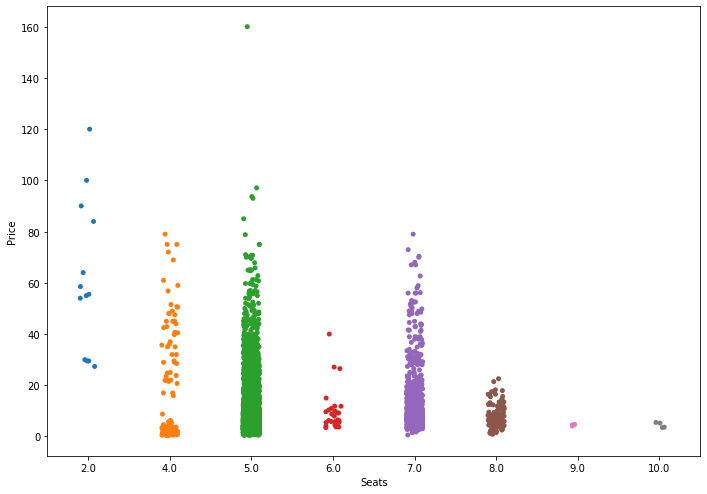

In [108]:
var = 'Seats'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = df) 

# Year Vs Price

In [109]:
temp = df.groupby(['Year']).mean()
temp['Year'] = temp.index
fig = px.bar(temp,x='Year',y='Price', 
             color = 'Price', 
             title = "Price Compared to Year",
             labels = {'Price': 'Price (in INR Lakhs)'},
             color_continuous_scale = 'Magma_r')
fig.show()

# Transmission type count

C:\Users\Bhavya Lahari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Transmission', ylabel='count'>

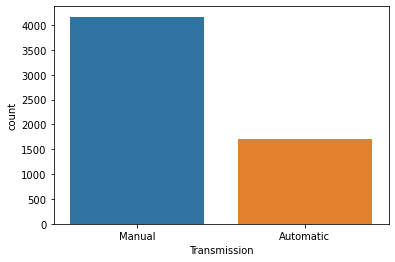

In [110]:
sns.countplot(df.Transmission)

In [111]:
df['Brand_Name'] = df['Name'].apply(lambda x: x.split()[0])
df['Brand_Name'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: Brand_Name, dtype: int64

In [112]:
#ISUZU and Isuzu have 2 different spellings, therefore integrating it to one.
df['Brand_Name'] = df['Brand_Name'].apply(lambda x: 'Isuzu' if x == 'ISUZU' else x)
df['Brand_Name'].value_counts()
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


# Brand Vs Price

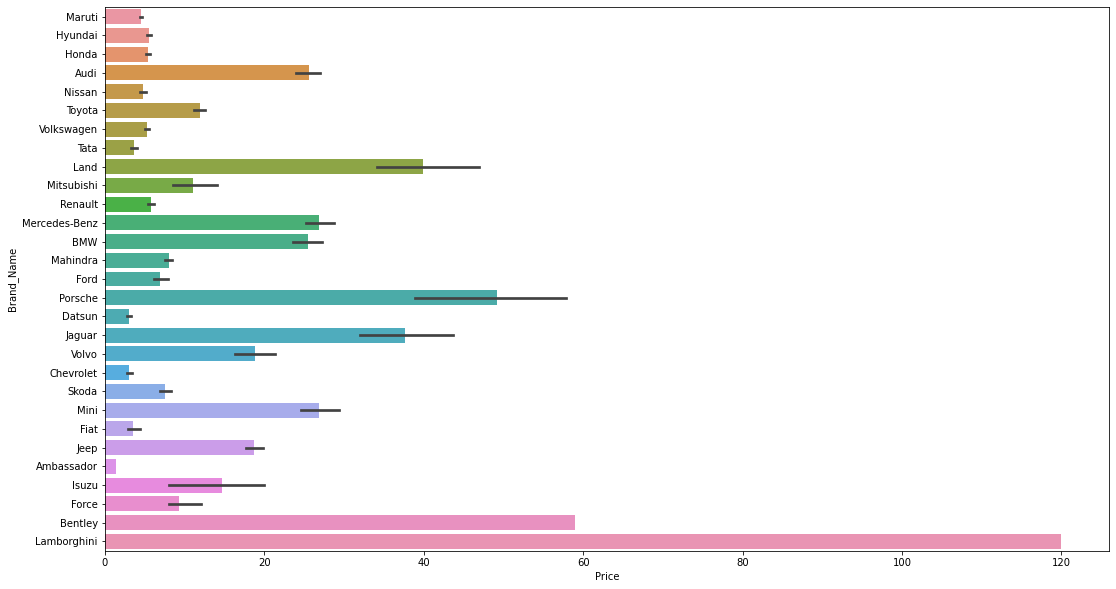

In [157]:
plt.figure(figsize=(18,10))
sns.barplot(y="Brand_Name", x="Price", data=df)
plt.show()

# Engine Vs Price

<AxesSubplot:xlabel='Engine', ylabel='Price'>

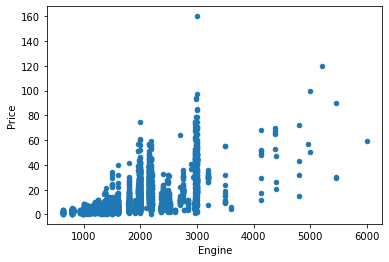

In [113]:
df.plot(x='Engine',y='Price',kind='scatter')

# Price Vs Owner_Type

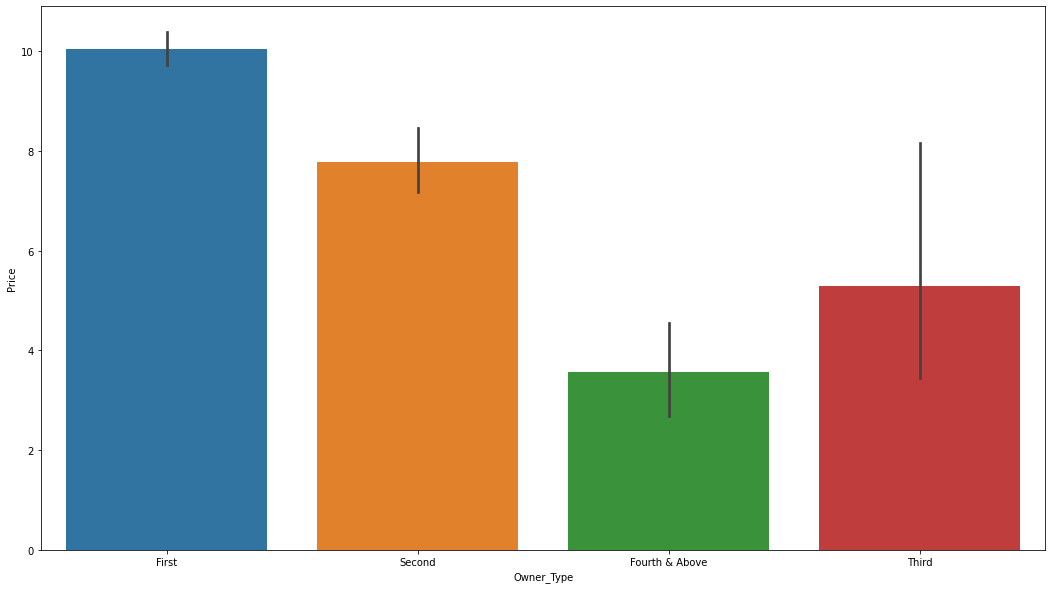

In [159]:
plt.figure(figsize=(18,10))
sns.barplot(y="Price", x="Owner_Type", data=df)
plt.show()

# Price Vs Location

<AxesSubplot:xlabel='Price', ylabel='Location'>

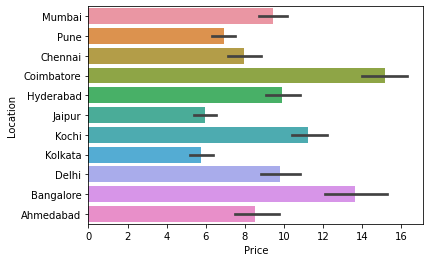

In [140]:
sns.barplot(y="Location", x="Price", data=df)

# Price Vs Transmission

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

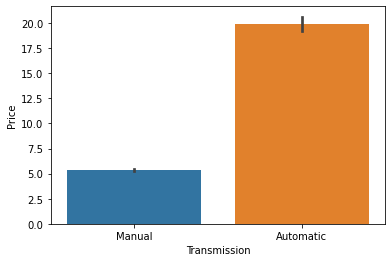

In [160]:
sns.barplot(y=df['Price'], x=df['Transmission'])

<AxesSubplot:xlabel='Power', ylabel='Price'>

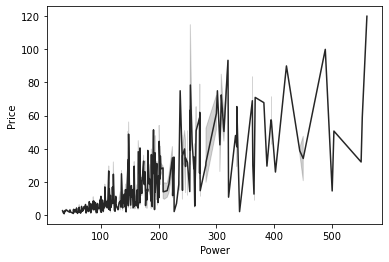

In [170]:
sns.lineplot(x=df['Power'], y=df['Price'], color=".15")

# Machine Learning

# Encoding Categorical Data

In [123]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [125]:
def encode_fuel(x):
    if x == 'CNG':
        return 1
    elif x == 'Diesel':
        return 2
    elif x == 'Petrol':
        return 3
    elif x == 'LPG':
        return 4
    else:
        return 5

df['encoded_Fuel_Type'] = df['Fuel_Type'].apply(encode_fuel)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,encoded_Fuel_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2


In [126]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [128]:
def encode_owner(x):
    if x == 'First':
        return 1
    if x == 'Second':
        return 2
    if x == 'Third':
        return 3
    if x == 'Fourth & Above':
        return 4
    
df['encoded_Owner_Type'] = df['Owner_Type'].apply(encode_owner)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,encoded_Fuel_Type,encoded_Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2,2


In [191]:
df.Location.unique()
def encode_location(x):
    if x == 'Mumbai':
        return 1
    if x == 'Pune':
        return 2
    if x == 'Chennai':
        return 3
    if x == 'Coimbatore':
        return 4
    if x=='Hyderabad':
        return 5
    if x=='Jaipur':
        return 6
    if x=='Kochi':
        return 7
    if x=='Kolkata':
        return 8
    if x=='Delhi':
        return 9
    if x=='Bangalore':
        return 10
    if x=='Ahmedabad':
        return 11
    
df['encoded_Location_Type'] = df['Location'].apply(encode_location)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,encoded_Fuel_Type,encoded_Owner_Type,encoded_Location_Type,encoded_Brand_Type,encoded_Transmission_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2,1,2,2,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3,1,3,3,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,3,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2,2,4,4,2


In [192]:
df.Brand_Name.unique()
def encode_brand(x):
    if x == 'Maruti':
        return 1
    if x == 'Hyundai':
        return 2
    if x == 'Honda':
        return 3
    if x == 'Audi':
        return 4
    if x=='Nissan':
        return 5
    if x=='Toyota':
        return 6
    if x=='Volkswagen':
        return 7
    if x=='Tata':
        return 8
    if x=='Land':
        return 9
    if x=='Mitsubishi':
        return 10
    if x=='Renault':
        return 11
    if x == 'Mercedes-Benz':
        return 12
    if x == 'BMW':
        return 13
    if x == 'Mahindra':
        return 14
    if x == 'Ford':
        return 15
    if x=='Porsche':
        return 16
    if x=='Datsun':
        return 17
    if x=='Jaguar':
        return 18
    if x=='Volvo':
        return 19
    if x=='Chevrolet':
        return 20
    if x=='Skoda':
        return 21
    if x=='Mini':
        return 22
    if x == 'Fiat':
        return 24
    if x == 'Jeep':
        return 25
    if x=='Porsche':
        return 26
    if x=='Datsun':
        return 27
    if x=='Ambassador':
        return 28
    if x=='Isuzu':
        return 29
    if x=='Force':
        return 30
    if x=='Bentley':
        return 31
    if x=='Lamborghini':
        return 32
    
df['encoded_Brand_Type'] = df['Brand_Name'].apply(encode_brand)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,encoded_Fuel_Type,encoded_Owner_Type,encoded_Location_Type,encoded_Brand_Type,encoded_Transmission_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2,1,2,2,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3,1,3,3,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,3,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2,2,4,4,2


In [193]:
df.Transmission.unique()
def encode_location(x):
    if x == 'Manual':
        return 1
    if x == 'Automatic':
        return 2
    
df['encoded_Transmission_Type'] = df['Transmission'].apply(encode_location)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,encoded_Fuel_Type,encoded_Owner_Type,encoded_Location_Type,encoded_Brand_Type,encoded_Transmission_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2,1,2,2,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3,1,3,3,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,3,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2,2,4,4,2


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

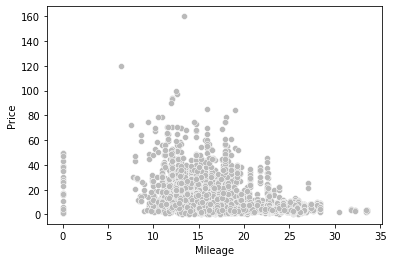

In [194]:
sns.scatterplot(x=df['Mileage'], y=df['Price'], color="0.73")

# Correlation Matrix

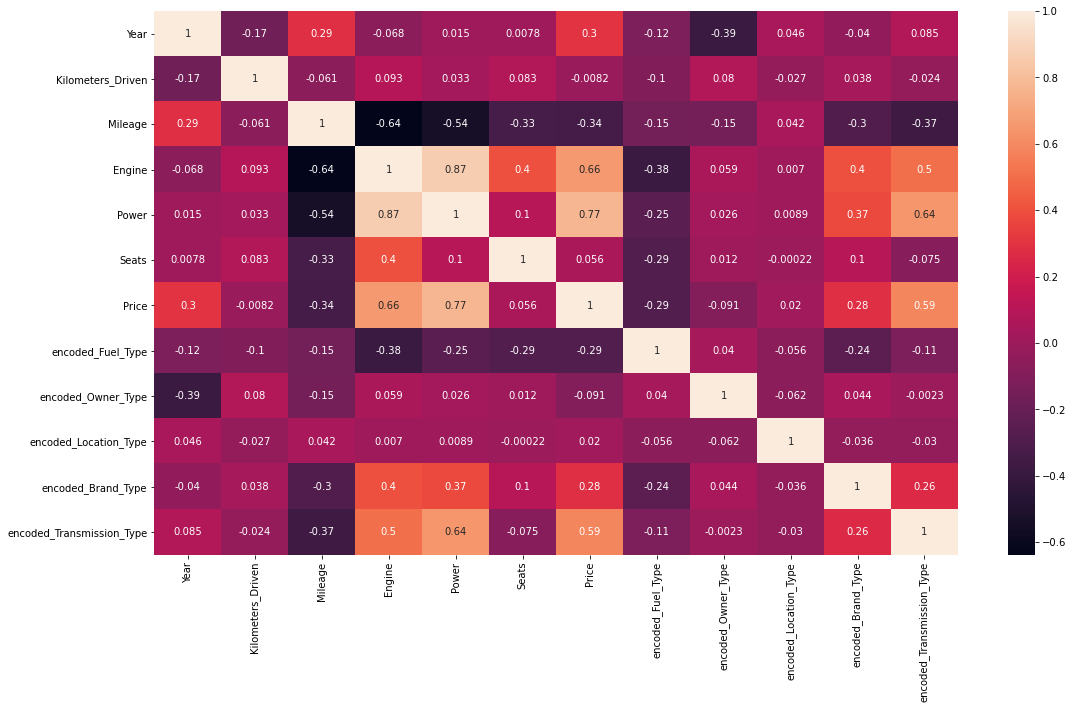

In [196]:
plt.figure(figsize=(18,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Taking out Price to Y

In [197]:
X= df.drop(['Price'],axis=1)
y= df['Price']
# Dropping Categorical Data
X=X.drop(['Name'],axis=1)
X=X.drop(['Fuel_Type'],axis=1)
X=X.drop(['Transmission'],axis=1)
X=X.drop(['Owner_Type'],axis=1)
X=X.drop(['Brand_Name'],axis=1)
X=X.drop(['Location'],axis=1)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,encoded_Fuel_Type,encoded_Owner_Type,encoded_Location_Type,encoded_Brand_Type,encoded_Transmission_Type
0,2010,72000,26.60,998.0,58.16,5.0,1,1,1,1,1
1,2015,41000,19.67,1582.0,126.20,5.0,2,1,2,2,1
2,2011,46000,18.20,1199.0,88.70,5.0,3,1,3,3,1
3,2012,87000,20.77,1248.0,88.76,7.0,2,1,3,1,1
4,2013,40670,15.20,1968.0,140.80,5.0,2,2,4,4,2


In [198]:
X.isnull().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
encoded_Fuel_Type            0
encoded_Owner_Type           0
encoded_Location_Type        0
encoded_Brand_Type           0
encoded_Transmission_Type    0
dtype: int64

In [206]:
# Splitting data into train and test
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.33, random_state=7)
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,encoded_Fuel_Type,encoded_Owner_Type,encoded_Location_Type,encoded_Brand_Type,encoded_Transmission_Type
2419,2016,11000,17.11,1968.0,174.33,5.0,2,1,3,4,2
5269,2015,16000,19.40,1198.0,86.80,5.0,3,1,3,3,1
2352,2014,66355,18.00,1198.0,86.70,5.0,3,1,7,3,1
1039,2010,93401,23.00,1396.0,90.00,5.0,2,1,7,2,1
5831,2006,78000,13.50,1405.0,60.00,5.0,3,2,2,8,1


# Train CART Model

In [219]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3934, 11)
(1938, 11)
(3934,)
(1938,)


In [267]:
model = DecisionTreeRegressor(random_state=7)

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy",model.score(X_test, Y_test)*100)

MAE 2.084814241486068
MSE 21.016663699690405
RMSE 15.107389027392331
Accuracy 80.15971770752937


In [221]:
model.predict([[2016,11000,17.11,1968.0,174.33,5.0,2,1,3,4,2]])
model.predict([[2010,72000,26.60,998.0,58.16,5.0,1,1,1,1,1]])
## The predicted value is 2.25 lakhs

array([2.25])

# Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression 
model_linear = LinearRegression ()
model_linear.fit(X_train, Y_train)
predicted_linear = model_linear.predict(X_test)
y_pred=predicted_linear
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy",model_linear.score(X_test, Y_test)*100)

MAE 3.7411653203397455
MSE 50.210872298434175
RMSE 14.541490024376134
Accuracy 52.599618341573276


# RandomForest Regressor

In [269]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)
y_pred= reg_rf.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy",reg_rf.score(X_test, Y_test)*100)

MAE 1.5657032255884813
MSE 11.317616539021264
RMSE 14.621608802075293
Accuracy 89.31587286066608


# Random Forest Regressor

In [272]:
from sklearn.ensemble import RandomForestRegressor
n_regr = RandomForestRegressor(random_state=42, n_estimators=100 )
n_regr.fit(X_train,y_train)
y_pred = n_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy",n_regr.score(X_test, Y_test)*100)

MAE 7.46885046808197
MSE 119.93376195464086
RMSE 11.476531059731117
Accuracy -13.220619960393698
